# Data cleaning

## Setup

### Import modules

In [2]:
# Data manipulation

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

import numpy as np
import re
import sklearn 

# NLP

import textdistance as td

# Plotting

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  
import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

# Miscellaneous

import rootpath
import glob

### Locate files

In [3]:
# Set root path for project

rpath = rootpath.detect()

### Compile data

In [16]:
# Create list of files to read in for glob
# Exclude generics and handlabels so they can be
# edited separately

excludedFiles = [f"{rpath}/data/raw/generics.csv",
                 f"{rpath}/data/raw/handlabels.csv"]
includedFiles = glob.glob(f"{rpath}/data/raw/*.csv")
grouped_data = list(set(includedFiles) - set(excludedFiles))

In [10]:
# Concatenate dataframes rowwise

df_raw = (
    pd.concat(
        [pd.read_csv(file, index_col=0) \
                for file in grouped_data],
              ignore_index=True)
    )

In [17]:
# Read in generics, toothpaste, and handlabeled data

df_generics = (
    pd.concat(
        [pd.read_csv(file, index_col=0) \
                for file in excludedFiles],
              ignore_index=True)
    )

In [20]:
df_generics.head()

,use_subcategory,skintype,brand_generic,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page,use_category
0,toothpaste,all,non_generic,Crest,Sensitivity Whitening Plus Scope Toothpaste Mi...,6.0,4.99,NaN,"Water, Hydrated Silica, Glycerin, Sorbitol, Tr...",4.7,NaN,117,https://www.walgreens.com/store/c/crest-sensit...,NaN,NaN
1,toothpaste,all,non_generic,Dr. Bronner's,Peppermint Toothpaste Peppermint,5.0,3.99,NaN,"Glycerin, Aloe Barbadensis Leaf Juice, Hydrate...",4.8,NaN,23,https://www.walgreens.com/store/c/dr.-bronner'...,NaN,NaN
2,toothpaste,all,non_generic,Biotene,Gentle Mint Fluoride Toothpaste Mint,4.3,6.29,NaN,"Water, Sorbitol, Hydrated Silica, Glycerin, Ca...",3.9,NaN,126,https://www.walgreens.com/store/c/biotene-gent...,NaN,NaN
3,toothpaste,all,non_generic,Arm & Hammer Advance White,Extreme Whitening Control with Baking Soda & P...,6.0,3.09,NaN,"Sodium Bicarbonate, PEG-8, Tetrasodium Pyropho...",4.5,NaN,141,https://www.walgreens.com/store/c/arm-%26-hamm...,NaN,NaN
4,toothpaste,all,non_generic,Tom's of Maine,Antiplaque & Whitening Toothpaste Peppermint,5.5,4.69,NaN,"Calcium Carbonate, Glycerin, Water, Xylitol, H...",4.7,NaN,40,https://www.walgreens.com/store/c/tom's-of-mai...,NaN,NaN


In [23]:
# Add brand_generics labels to raw df

df_raw['brand_generic'] = 'non_generic'

In [24]:
# Reorder column names 

column_names = df_generics.columns
df_raw = df_raw.reindex(columns=column_names)


## Examine data

In [10]:
df_raw.shape

(2390, 14)

In [17]:
df_raw.head()

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page
0,cleanser,face wash,normal,Peter Thomas Roth,Travel Size Anti-Aging Cleansing Gel,Size 2.0 oz|,Price\n$12.00,"Oil-free, anti-wrinkle technology helps to cla...","Water/Aqua/Eau, Sodium Laureth Sulfate, Cocami...",4.2,NaN,39 Reviews,https://www.ulta.com/travel-size-anti-aging-cl...,3.0
1,cleanser,face wash,normal,Awake Beauty,Glow Smoothie Jelly Cleanser,Size 5 oz|,Price\n$22.00,Glow Smoothie Jelly Cleanser from Awake is a s...,"Water/Aqua/Eau, Glycereth-18 Ethylhexanoate, G...",4.8,NaN,21 Reviews,https://www.ulta.com/glow-smoothie-jelly-clean...,3.0
2,cleanser,face wash,normal,Vichy,Pureté Thermale Mineral Micellar Water for Sen...,Size 6.7 oz|,Price\n$14.50,Vichy Pureté Thermale Mineral Micellar Water f...,"Aqua, Hexylene Glycol, Glycerin, Sodium Cocoam...",4.6,NaN,111 Reviews,https://www.ulta.com/purete-thermale-mineral-m...,3.0
3,cleanser,face wash,normal,GLAMGLOW,GENTLEBUBBLE Daily Conditioning Cleanser,Size 0.5 oz|,Price\n$29.00,GLAMGLOW GENTLEBUBBLE Daily Conditioning Clean...,"Water\Aqua\Eau, Sodium Cocoyl Glycinate, Glyce...",4.8,NaN,25 Reviews,https://www.ulta.com/gentlebubble-daily-condit...,3.0
4,cleanser,face wash,normal,StriVectin,Moisture Matrix Melting Cleanser,Size 4 oz|,Price\n$35.00,This transforming cleanser not only melts away...,"Caprylic/Capric Triglyceride, Glycerin, Aqua (...",4.3,NaN,93 Reviews,https://www.ulta.com/moisture-matrix-melting-c...,3.0


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   use_category     2380 non-null   object 
 1   use_subcategory  2390 non-null   object 
 2   skintype         2390 non-null   object 
 3   brand            2311 non-null   object 
 4   product          2390 non-null   object 
 5   size             2376 non-null   object 
 6   price            2390 non-null   object 
 7   details          2380 non-null   object 
 8   ingredients      2282 non-null   object 
 9   ratings          2206 non-null   float64
 10  perc_respondrec  885 non-null    object 
 11  total_reviews    2232 non-null   object 
 12  link             2390 non-null   object 
 13  page             2380 non-null   float64
dtypes: float64(2), object(12)
memory usage: 261.5+ KB


- Missing data in several columns
- Price and size have text and need to be converted to floats
- total_reviews should be an integer

## Cleaning

**Check for correct categories in categorical data**

In [19]:
# Check for correct categories

col_to_check = ['use_category','use_subcategory','skintype']

for col in col_to_check:
    print(df_raw[col].unique())

['cleanser' 'treatments and serums' 'moisturizer' nan]
['face wash' 'toner' 'face serum' 'face moisturizer' 'toothpaste']
['normal' 'oily' 'Unknown' 'dry' 'all']


### Size

**Check what is turning size into an object**

In [20]:
df_raw['size'].unique()

array(['Size 2.0 oz|', 'Size 5 oz|', 'Size 6.7 oz|', 'Size 0.5 oz|',
       'Size 4 oz|', 'Size 5.0 oz|', 'Item 2557643', 'Size 1.0 oz|',
       'Size 6.0 oz|', 'Size 4.2 oz|', 'Size 5.4 oz|', 'Size 3.34 oz|',
       'Size 3.4 oz|', 'Size 5.07 oz|', 'Size 2 oz|', 'Size 5.5 oz|',
       'Size 1.6 oz|', 'Size 2.5 oz|', 'Size 6.8 oz|', 'Size 4.0 oz|',
       'Size 8 oz|', 'Size 3.67 oz|', 'Size 6.5 oz|', 'Size 0.6 oz|',
       'Size 1.4 oz|', 'Size 3.7 oz|', 'Item 2530959', 'Item 2554759',
       'Size 3.0 oz|', 'Size 8.4 oz|', 'ounce', 'Size 6.76 oz|',
       'Size 8.0 oz|', 'Size 1.69 oz|', 'Size 12.0 oz|', '12.0 oz',
       'Size 3.3 oz|', 'Size 5.3 oz|', 'Item 2554229', 'Size 7.2 oz|',
       'Item 2271621', 'Size 6.4 oz|', 'Size 6 oz|', 'Size 0.49 oz|',
       'Size 6.75 oz|', '4.0 oz', 'Size 8.5 oz|', 'Size 2.82 oz|',
       'Item 2559381', 'Item 2555572', 'Size 2.2 oz|', 'Size 0.7 oz|',
       'Size 25 ct|', 'Size 0.36 oz|', 'Size 5.1 oz|', 'Size 2.8 oz|',
       'Size 1.7 oz|', 'I

**Input errors examples:**
- Size 2.0 oz
    - Remove Size and oz
- Item 2209845
    - Remove rows with no size
- Size 1.61 oz|Item 2541043
    - Remove size, oz|item and item number
- Hydrating Clearing Jelly+
    - Remove text only (though unable to tell this apart from numeric since object dtype)
- 1.01 oz
    - Remove oz
- 2 ct
    - Remove since not comparable to other size measures

**Remove NA's in key columns**

In [6]:
df_raw.dropna(subset=['size','price'], inplace=True)

# Check
# df_raw['price'].isnull().sum()

**Drop rows without size information in oz**

In [7]:
# Text to remove

droptext = ['ounce', 'ct', 'Original', 'Rose Petal',
            'Hydrating Clearing Jelly+', 'Hydrating Jelly',
            'Imperfections', 'Calm']

In [8]:
# Filter rows with text using boolean indexing with tilde 

df_raw = df_raw[~df_raw['size'].str.contains('|'.join(droptext),
                                             case=False,
                                             na=False)]

**Replace cells with ' oz|Item' to blank since these also contain size information**

In [9]:
# Text to remove via regex

drop_size_text = ['\ oz\|Item \d{7}','Item \d{7}','Size ',' oz\|', ' oz']

In [10]:
# drop text

df_raw.loc[:,'size'] = (
    df_raw['size'].str.replace('|'.join(drop_size_text),
                               '',regex=True)
)

**Drop rows that are blanks**

In [11]:
df_raw = df_raw[df_raw['size'] != '']

In [17]:
# Check remaining values are numbers only 

df_raw['size'].unique()

# Note nan to be removed later

array(['2.0', '5', '6.7', '0.5', '4', '5.0', '1.0', '6.0', '4.2', '5.4',
       '3.34', '3.4', '5.07', '2', '5.5', '1.6', '2.5', '6.8', '4.0', '8',
       '3.67', '6.5', '0.6', '1.4', '3.7', '3.0', '8.4', '6.76', '8.0',
       '1.69', '12.0', '3.3', '5.3', '7.2', '6.4', '6', '0.49', '6.75',
       '8.5', '2.82', '2.2', '0.7', '0.36', '5.1', '2.8', '1.7', '3.38',
       '4.5', '5.8', '7.0', '2.46', '13.5', '6.08', '8.45', '12', '4.6',
       '13.6', '4.1', '5.10', '6.67', '4.05', '.67', '1', '4.39', '9.46',
       '5.2', '16.9', '16.0', '4.3', '6.3', '33.0', '7.1', nan, '1.75',
       '4.7', '1.68', '1.76', '1.8', '3.53', '3.9', '1.014', '1.49',
       '9.4', '7.8', '6.6', '2.71', '0.23', '2.19', '2.29', '0.67',
       '0.40', '2.53', '4.4', '6.77', '0.95', '5.06', '4.22', '0.50',
       '1.5', '10.14', '0.34', '1.57', '0.85', '3.52', '1.35', '1.01',
       '0.3', '0.29', '0.51', '0.45', '1.17', '1.3', '0.60', '0.24',
       '0.27', '0.25', '0.94', '0.75', '0.66', '3.5', '2.3', '3.04',


**Convert size to float**

In [12]:
df_raw['size'] = df_raw['size'].astype(float)

### Price

**Check input errors**

In [29]:
df_raw['price'].unique()

array(['Price\n$12.00', 'Price\n$22.00', 'Price\n$14.50', 'Price\n$29.00',
       'Price\n$35.00', 'Price\n$18.00', 'Price\n$6.99', 'Price\n$5.50',
       'Price\n$10.00', 'Price\n$17.00', 'Price\n$20.00', 'Price\n$28.00',
       'Price\n$8.99', 'Price\n$26.00', 'Price\n$49.00', 'Price\n$16.00',
       'Price\n$9.00', 'Price\n$15.00', 'Price\n$12.99', 'Price\n$14.00',
       'Price\n$7.00', 'Price\n$7.49', 'Price\n$8.50', 'Price\n$42.00',
       'Price\n$24.00', 'Price\n$5.00',
       'Sale Price\n$12.00\nOriginal Price\n$16.00', 'Price\n$32.00',
       'Price\n$25.00', 'Price\n$3.49',
       'Sale Price\n$11.25\nOriginal Price\n$15.00', 'Price\n$6.00',
       'Price\n$10.99', 'Price\n$36.00',
       'Sale Price\n$23.80\nOriginal Price\n$34.00', 'Price\n$50.00',
       'Price\n$14.99', 'Price\n$34.00', 'Price\n$9.99',
       'Sale Price\n$11.16\nOriginal Price\n$13.95', 'Price\n$38.00',
       'Price\n$30.00', 'Price\n$13.00',
       'Sale Price\n$12.40\nOriginal Price\n$15.50', 'Price

**Replace cells with ' oz|Item' to blank since these also contain size information**

In [13]:
# Text to remove via regex

drop_price_text = ['Price\\n\$',
                   'Sale Price\\n\$[0-9]+\.[0-9]+\\nOriginal Price\\n\$',
                   'Price\\n\$','\\nMarket Value\\n\(\$[0-9]+ value\)']

In [14]:
# drop price text
 
df_raw.loc[:,'price'] = (
    df_raw['price'].str.replace('|'.join(drop_price_text),
                               '',regex=True)
)

In [32]:
df_raw.price.unique()

array(['12.00', '22.00', '14.50', '29.00', '35.00', '18.00', '6.99',
       '5.50', '10.00', '17.00', '20.00', '28.00', '8.99', '26.00',
       '49.00', '16.00', '9.00', '15.00', '12.99', '14.00', '7.00',
       '7.49', '8.50', '42.00', '24.00', '5.00', '32.00', '25.00', '3.49',
       '6.00', '10.99', '36.00', '34.00', '50.00', '14.99', '9.99',
       '13.95', '38.00', '30.00', '13.00', '15.50', '23.00', '31.00',
       '40.00', '13.75', '33.00', '11.00', '9.49', '13.50', '8.00',
       '47.00', '11.49', '12.50', '8.49', '7.99', '13.99', '28.50',
       '17.50', '39.00', '19.00', '45.00', '14.95', '48.00', '3.99',
       '13.49', '62.00', '7.90', '4.99', '22.50', '14.49', '19.50',
       '16.50', '15.99', '27.00', '54.00', '11.99', '64.00', nan, '69.00',
       '75.00', '27.49', '65.00', '87.00', '85.00', '19.99', '24.99',
       '95.00', '7.70', '25.99', '78.00', '26.99', '31.99', '5.49',
       '52.00', '49.50', '60.00', '39.50', '68.00', '17.99', '18.99',
       '28.99', '70.00', '

**Convert price to float**

In [15]:
df_raw['price'] = df_raw['price'].astype(float)

### Reviews

**Remove review text**

In [16]:
df_raw['total_reviews'] = (
    df_raw['total_reviews'].str.replace(' Reviews| Review', '', regex=True)
)

In [35]:
# Check for no more text

df_raw['total_reviews'].unique()

array(['39', '21', '111', '25', '93', '15', '218', '44', '364', '146',
       '47', '300', '1', '78', '56', '2', '85', '66', '7', '9', '171',
       '90', '6', '8', '201', '167', '5', '12', '3', '246', '13', '40',
       '41', '59', '35', '51', '57', '24', '149', '257', '48', '100',
       '818', '346', '11', '83', '19', nan, '597', '142', '45', '190',
       '278', '62', '461', '33', '164', '258', '37', '89', '43', '367',
       '75', '502', '265', '119', '1298', '280', '152', '817', '159',
       '169', '14', '192', '174', '42', '243', '22', '291', '70', '166',
       '26', '208', '330', '36', '376', '765', '58', '20', '63', '69',
       '27', '313', '53', '245', '288', '178', '306', '240', '97', '327',
       '18', '203', '230', '34', '86', '340', '468', '71', '49', '8114',
       '952', '1090', '721', '838', '673', '116', '214', '365', '129',
       '92', '115', '216', '303', '267', '118', '179', '165', '425',
       '1165', '233', '180', '103', '489', '80', '23', '82', '125', '101

**Convert review column to integer**

In [17]:
df_raw['total_reviews'] = (
    df_raw['total_reviews'].astype(np.float).astype('Int64')
)

### Ingredients

**Remove rows with no ingredient information, 11 rows**

In [18]:
df_raw.dropna(subset=['ingredients'], inplace = True)

In [20]:
df_raw['ingredients'].unique()[:2]

array(['Water/Aqua/Eau, Sodium Laureth Sulfate, Cocamidopropyl Betaine, Lauryl Glucoside, Propylene Glycol, Salicylic Acid, Glycolic Acid, Quercus Alba Bark Extract, Citrus Grandis (Grapefruit) Fruit Extract, Prunus Persica (Peach) Fruit Extract, Citrus Aurantifolia (Lime) Fruit Extract, Citrus Limon (Lemon) Fruit Extract, Arginine, Tilia Cordata Flower Extract, Allantoin, BHT, Panthenol, Butylene Glycol, Potassium Sorbate, Sodium Benzoate, Phenoxyethanol, Amyl Cinnamal, Linalool, Fragrance/Parfum, Red 40 (CI 16035), Yellow 5 (CI 19140).',
       'Water/Aqua/Eau, Glycereth-18 Ethylhexanoate, Glycerin, Sodium C14 16 Olefin Sulfonate, Cocamidopropyl Betaine, Sodium Cocoyl Apple Amino Acids, Glycereth-18, Xanthan Gum, Sodium Chloride, Hexylene Glycol, Sodium Levulinate, Citric Acid, Butylene Glycol, Disodium EDTA, Potassium Sorbate, Decyl Glucoside, Lauryl Glucoside, Citrus Grandis (Grapefruit) Peel Extract, Tetrasodium EDTA, Limonene, 1,2-Hexanediol, Agar, Calcium Alginate, Gellan Gum, D

**Get general idea for how long some of these ingredients are**

In [ ]:
#len('However, because ingredients are subject to change') # 50
#len('Citrus Aurantium Dulcis (Orange) Fruit Water') # 44
#len('Aloe Barbadensis/Aloe Barbadensis Leaf Juice') # 44
#len('Rosmarinus Officinalis (Rosemary) Leaf Extract')

**Create df copy for text manipulation**

In [19]:
df_temp = df_raw.copy()

**Convert strings of ingredient lists to lists of individual ingredient strings** 

In [20]:
# Text to split by via regex

drop_delim_text = [
    ', ',',', '\*','\\n','\.', '\;','.and.','inactive\: ','\&', #' - ',
]

In [21]:
# Change string of ingredients into a list containing a string for each ingredient, split by the following characters

df_temp['ingredients'] = (
    df_temp['ingredients'].str.split('|'.join(drop_delim_text)) 
)

In [22]:
# strip whitespace from around each ingredient and change to lowercase

df_temp['ingredients'] = [
    [ingredient.strip().lower() for ingredient in product]
        for product in df_temp['ingredients']
]

**Expand ingredient lists from lists of ingredients to rows of each ingredient in df**

In [23]:
df_temp = df_temp.explode('ingredients')

In [714]:
#df_temp[:5]

**Check for input errors**

In [715]:
# Print unique ingred subset

#df_temp['ingredients'].unique()[:500]

**Notes**
- Some ingredients are way too long and contain irrelevant information
- Different names and formatting for water, fragrance, even extracts
- Some ingredients also have symbols *

**Get length of each ingredient string**

In [24]:
# Order ingredients

sort_ingred_list = np.sort(df_temp['ingredients'].unique())

In [25]:
# Count string length of ingredient entry

ingred_len = [len(ingredient) for ingredient in sort_ingred_list]

In [26]:
# Turn into a df of the ingredient and its length

ingred_str = (
    pd.DataFrame(data={'ingredient':sort_ingred_list,'ingred_len':ingred_len})
)

In [494]:
ingred_str.head()

,ingredient,ingred_len
0,,0
1,# b172461/1,11
2,# b201629/1,11
3,(aqua) water,12
4,(coconut source),16


**Plot distribution of ingredient lengths**

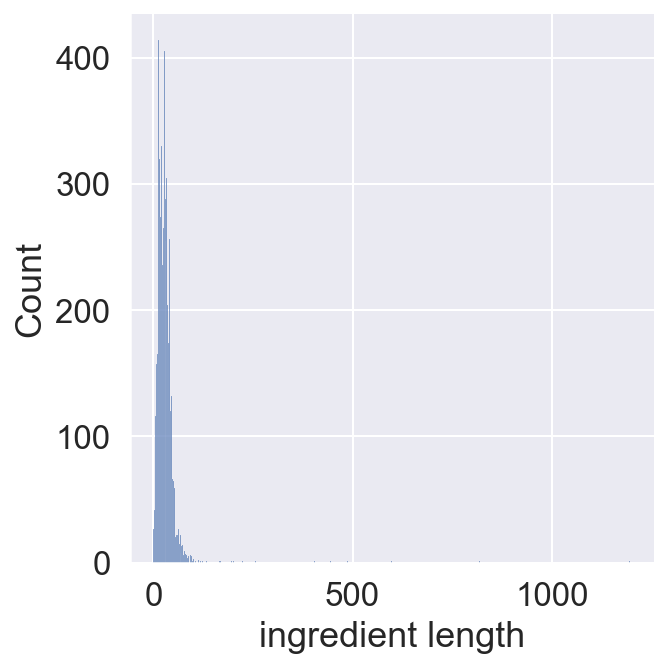

In [495]:
fig = sns.displot(ingred_str, x='ingred_len')
plt.xlabel("ingredient length")
plt.show(fig)

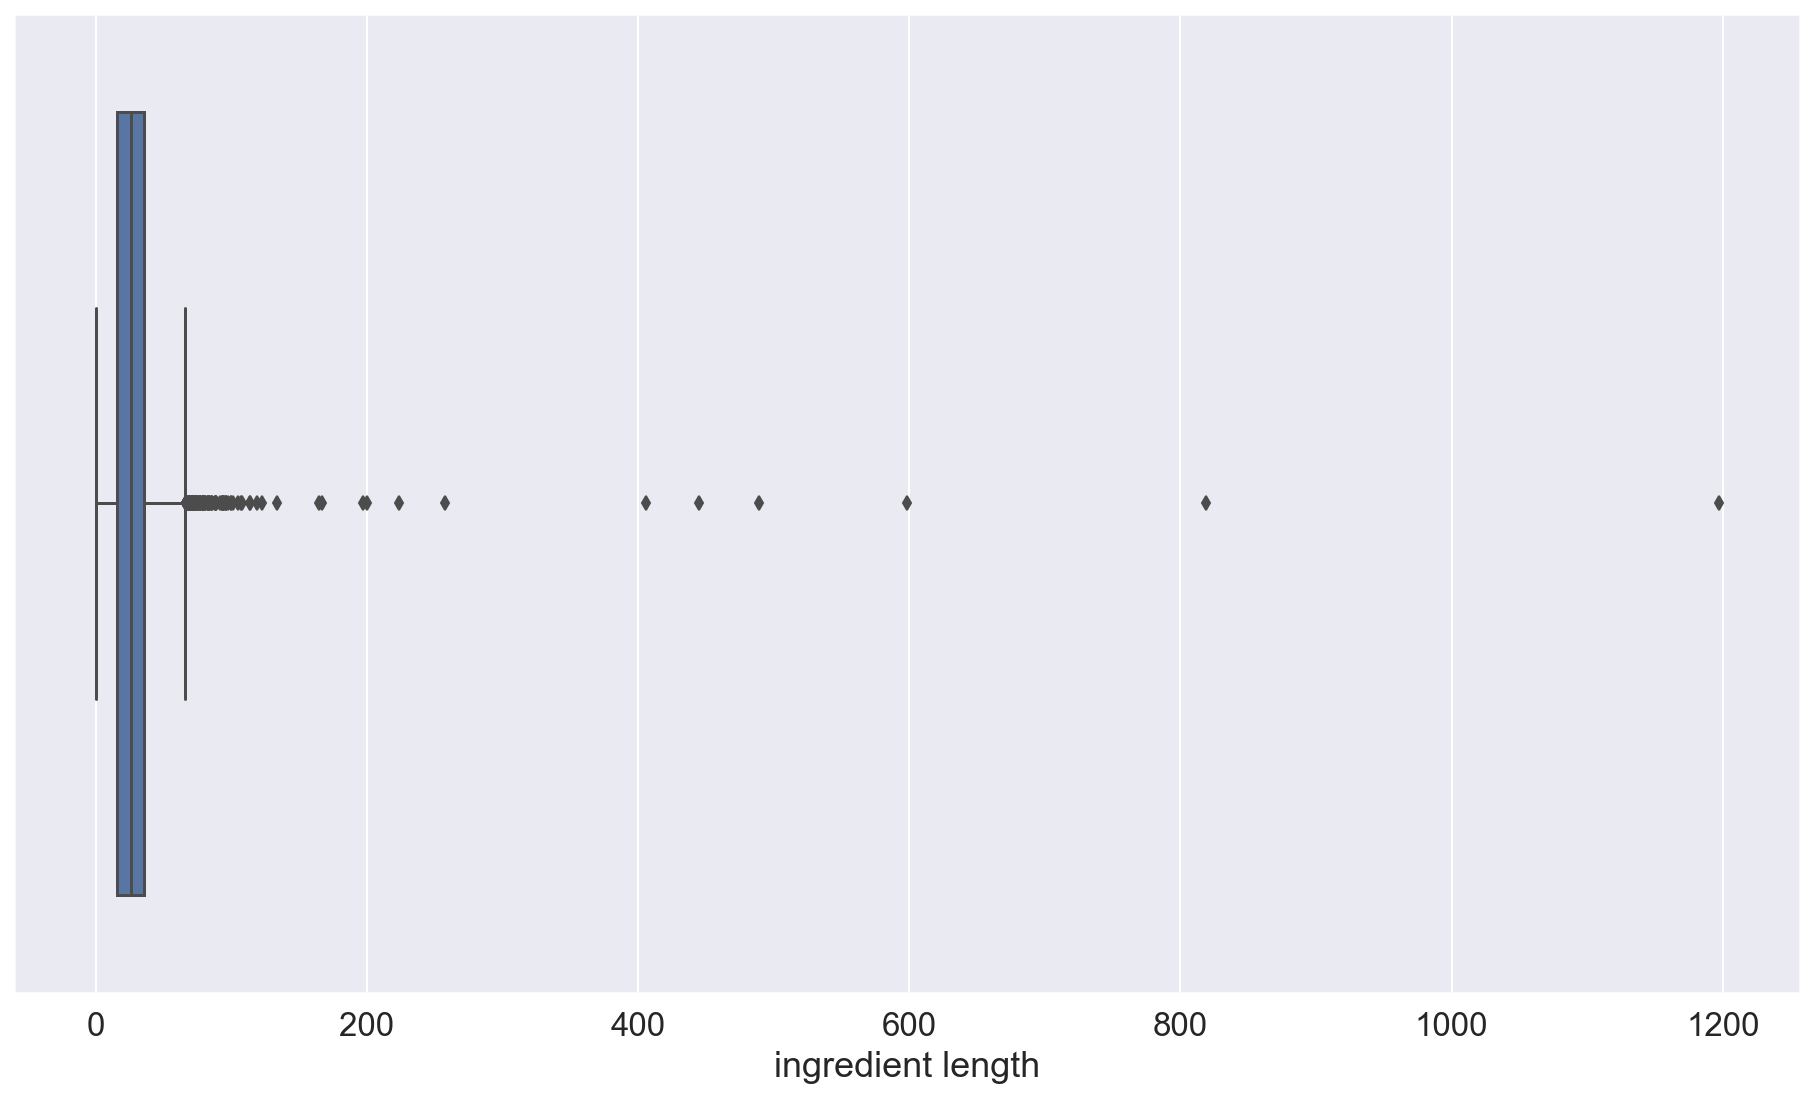

In [496]:
fig2 = sns.boxplot(x=ingred_str['ingred_len'])
plt.xlabel("ingredient length")
plt.show(fig2)

**Numeric summary of distribution**

In [338]:
ingred_str.describe()

,ingred_len
count,4917.000000
mean,28.799878
std,29.004030
min,0.000000
25%,16.000000
50%,26.000000
75%,36.000000
max,1197.000000


- Major right tail skew! Lots of outliers and should be removed

**Examine outliers**

In [27]:
# Count how many occurences of each ingredient

ingred_cts = df_temp['ingredients'].value_counts().to_frame()

In [28]:
# Turn counts into df and rename columns

ingred_cts = (
    ingred_cts.reset_index() \
    .rename({'index':'ingredient','ingredients':'cts'}, axis = 'columns')
)

In [29]:
# join ingredient lengths and ingredient counts

ingred_str2 = (
    ingred_str.join(ingred_cts.set_index('ingredient'),
                    on='ingredient', how='left')
)

In [501]:
# View ingredients with lengths that are past the 75% quartile

ingred_str2[ingred_str2.ingred_len > 36] \
            .sort_values(by=['ingredient'], ascending=True)

,ingredient,ingred_len,cts
6,(euterpe oleracea/euterpe precatoria/theobroma g,48,2
25,0 %) inactive ingredients: water (aqua),39,1
27,0% inactive ingredients: water (aqua),37,3
37,100% natural ingredients: helianthus annuus se...,52,2
38,100% natural ingredients: sodium cocoate,40,6
39,100% natural ingredients: sodium cocoate,40,3
41,15% pure vitamin c from pure ascorbic acid,42,5
44,2% inactive ingredients: water/aqua/eau,39,5
48,2-hexanediol adenosine ceteth-20 peg/ppg-18/18...,1197,2
88,95% naturally derived/dérivé naturellement,42,1


**Remove ingredient rows that have <= 2 characters**

In [573]:
df_temp.shape

(72790, 14)

In [30]:
df_temp = df_temp[df_temp['ingredients'].str.len() > 2]

In [577]:
df_temp.shape

(66102, 14)

**Remove duplicate products**

In [31]:
# Move this to later IF end up wanting to use product type information 

df_temp = df_temp.drop_duplicates(subset=['product','ingredients'])

In [25]:
df_temp.shape

(31939, 14)

**Replace text like extract or oil with blanks**
- Remove since the type of ingredient here just adds noise to finding duplicate ingredients

In [32]:
# Text to remove via regex

drop_size_text = ['extract','oil']

In [33]:
# drop text

df_temp['ingredients'] = (
    df_temp['ingredients'].str.replace('|'.join(drop_size_text),
                               '',regex=True)
)

In [28]:
df_temp.shape

(31939, 14)

In [29]:
len(df_temp['ingredients'].unique())

4830

**Replace common strings that contain spelling variations**

In [34]:
# water

df_temp.loc[df_temp['ingredients'].str.contains('water|eau|aqua'), 'ingredients'] = 'water'

In [35]:
# Fragrance 

df_temp.loc[df_temp['ingredients'] \
            .str.contains('fragrance|parfum|perfume'),
                'ingredients'] = 'fragrance'

In [36]:
# Words inside parentheses and including the surrounding parentheses
# Replace with blanks

df_temp.loc[df_temp['ingredients'] \
            .str.contains('\([^)]+\)'), 'ingredients'] = ''

In [37]:
# Strip whitespace

df_temp['ingredients'] = df_temp['ingredients'].str.strip()

In [728]:
# Quick check of results 

df_temp['ingredients'].unique()[:10]

array(['water', 'sodium laureth sulfate', 'cocamidopropyl betaine',
       'lauryl glucoside', 'propylene glycol', 'salicylic acid',
       'glycolic acid', 'quercus alba bark', 'citrus g', '', 'arginine',
       'tilia cordata flower', 'allantoin', 'bht', 'panthenol',
       'butylene glycol', 'potassium sorbate', 'sodium benzoate',
       'phenoxyethanol', 'amyl cinnamal', 'linalool', 'fragrance',
       'glycereth-18 ethylhexanoate', 'glycerin',
       'sodium c14 16 olefin sulfonate',
       'sodium cocoyl apple amino acids', 'glycereth-18', 'xanthan gum',
       'sodium chloride', 'hexylene glycol', 'sodium levulinate',
       'citric acid', 'disodium edta', 'decyl glucoside',
       'tetrasodium edta', 'limonene', '1', '2-hexanediol', 'agar',
       'calcium alginate', 'gellan gum', 'dmdm hydantoin', 'alcohol',
       'mica', 'gardenia jasminoides fruit', 'la',
       'sodium cocoamphoacetate', 'poloxamer 184', 'myrtrimonium bromide',
       'sodium cocoyl glycinate', 'cocamidopr

In [729]:
df_temp.shape

(31939, 14)

**Remove rows that contain the following words or characters**

In [38]:
# Text indicators of ingredient input errors to drop by via regex

drop_ingred_text = ['please','origin','bioactive','product','propellant',
                    'agriculture','dermalogica','certified','ingredient.',
                    'expected','commercial','commitment','dedicated',
                    'firming','appearance','syntacks','developed','list',
                    'components','guarantee','means','item','eligible',
                    'constituent','antioxidant','overwhelmed','derived',
                    'see','opens','ulta','details','ext','ci','details',
                    'dissipates','defenses','protect','reaction',
                    'contributes','occurring','skin','produced','\#']

# Old list
# 'because|however|please|we|because|this|error\-free|^1|\*essential oi|^$|ext'

In [39]:
# Drop rows that contain any of the drop ingredient text

df_temp = (
    df_temp[~df_temp['ingredients'].str.contains('|'.join(drop_ingred_text))]
)

In [587]:
df_temp.shape

(26837, 14)

In [742]:
# Check last ingredients

df_temp['ingredients'].unique()[3300:]

array(['hydroxyphenyl', 'ropamidobenzoic acid',
       'acrylates/ c10-30 alkyl acrylate', 'rosspolymer',
       'caprylic / capric triglyceride', 'trisodium hedta',
       'bambusa arundinacea stem', 'naringenin', 'panthenyl triacetate',
       'hydroxyethyl acrylate/sodium acroyldimethyl taurate copolymer',
       'capryllhydroxamic acid', 'pinus densiflora leaf',
       'acrylamide/ammonium acrylate copolymer', 'salix alba',
       'larrea divaricata', 'lechithin',
       'sodium coco pg-dimonium chloride phosphate',
       'hydrogenated microcrystalline wax',
       'disodium laureth sulphosuccinate',
       '95% naturally derived/dérivé naturellement', 'oligosaccharide',
       'ci 77891/titanium', 'dioxide', 'hectorite',
       'palmitoyl myristyl serinate', 'sodium cetearyl sulfate',
       'phenethylalcohol', 'hyrdolyzed jojoba esters',
       'glycerophosphoinositol choline',
       'acrylates/c10-30 alkyl acrylates crosspolymer', 'disoidum edta',
       'sodium olefin sulfona

**Remove blank ingredients**

In [40]:
# Drop rows with empty strings

df_temp = df_temp[df_temp['ingredients'] != '']

In [589]:
df_temp.shape

(22770, 14)

**Recheck length of each ingredient string after above mods**

In [41]:
# Order ingredients

sort_ingred_list = np.sort(df_temp['ingredients'].unique())

In [42]:
# Count string length of ingredient entry

ingred_len = [len(ingredient) for ingredient in sort_ingred_list]

In [43]:
# Turn into a df of the ingredient and its length

ingred_str = (
    pd.DataFrame(data={'ingredient':sort_ingred_list,'ingred_len':ingred_len})
)

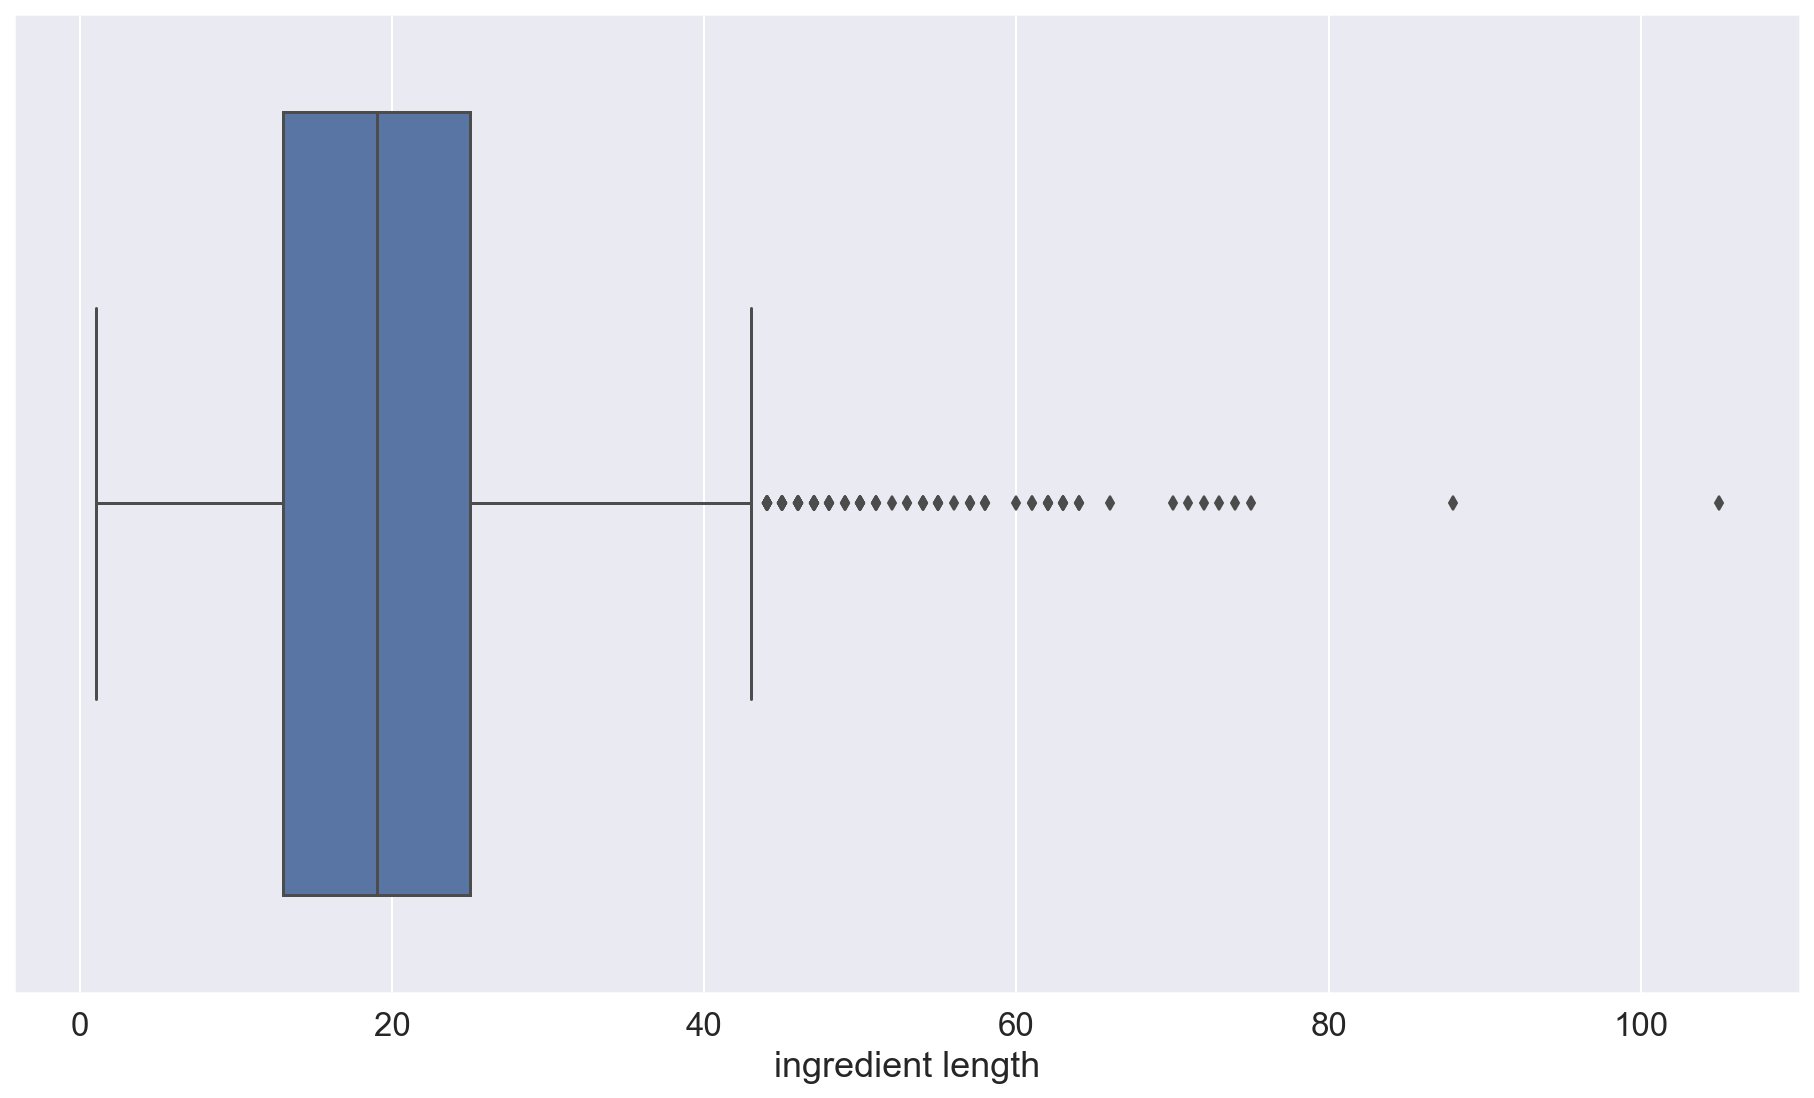

In [593]:
fig2 = sns.boxplot(x=ingred_str['ingred_len'])
plt.xlabel("ingredient length")
plt.show(fig2)

In [595]:
ingred_str.sort_values(by='ingred_len', ascending=True)[:100]

,ingredient,ingred_len
2158,s,1
1493,n),2
423,ca,2
330,bht,3
31,75%,3
648,cor,3
28,7%),3
27,67%,3
23,50%,3
2042,pro,3


**Remove ingredient rows that have <= 3 characters**

In [44]:
# Create a col of ingredient lengths

df_temp['ingred_len'] = df_temp['ingredients'].str.len()

In [597]:
df_temp.shape

(22770, 15)

In [45]:
# Remove ingredients that have strings less than or equal to 3

df_temp = df_temp[df_temp['ingred_len'] > 3]

In [601]:
df_temp.shape

(22616, 15)

**Sort ingredients by ingredient name**

In [46]:
# Reset index for sorting

ingred_all = (
    df_temp['ingredients'].reset_index() \
                          .rename(columns={'index':'product_index'})
)

In [47]:
# Sort ingredients by ingredient name

ingred_all.sort_values(by='ingredients',inplace=True)

**Calculate JW similarities for each ingredient combination**

In [48]:
ingred_all = ingred_all['ingredients']

In [49]:
# Create new object of original ingredient list

og_ingred = df_temp['ingredients']

In [50]:
# Create list of unique ingredients

uni_ingred = df_temp['ingredients'].unique()

In [51]:
# Create empty dataframe to append final results to (must be outside of for loop)

sim_res = (
    pd.DataFrame(columns=['input_ingred', 'compare_ingred', 'jaro_wink'])
)

In [52]:
# For loop to calculate all possible similarities between each unique ingredient and all other unique ingredients

for input_ingred in uni_ingred:
    # Create empty lists to store results in for similarity metric,
    #   input ingredient, and the ingredient being compared to the
    #   input ingredient
    jw_sim = []
    input_ingreds = []
    compare_ingreds = []
    for compare_ingred in uni_ingred:
        jw_sim.append(td.jaro_winkler(input_ingred, compare_ingred))
        input_ingreds.append(input_ingred)
        compare_ingreds.append(compare_ingred)
    # So now have full list of comparisons for 1 input ingredient
    # Concat results to a df for that 1 input ingredients
    sim_res_temp = pd.DataFrame({
                       'input_ingred':input_ingreds,
                       'compare_ingred': compare_ingreds,
                       'jaro_wink':jw_sim,
                       })
    # Filter by threshold and store in a list
    sim_res_filtered = (
        sim_res_temp.query('input_ingred != compare_ingred & \
                            jaro_wink >= 0.9')
        )
    # Append filtered similarity results to the master dataframe
    sim_res = sim_res.append(sim_res_filtered)

**Create dictionary of mispelled ingredients and their replacement ingredient** 

In [53]:
# Create temporary empty lists for storing results in for loop

compare_ingred_tmp = []
input_ingred_tmp = []

In [54]:
# Replace ingredient comparisons with input ingredient
# Want to make sure that input ingredients are not previous comparison
# ingredients since the same ingredient could be used twice.
# Also want to make sure that only input ingredients are used once.

for input_ingredient,comparison_ingredient in \
    zip(sim_res['input_ingred'], sim_res['compare_ingred']):
    # Check if input or comparison ingredient is in the list of comparison
    # ingredients
    # Continue loop and do NOT add ingredient if already in comparison
    # ingredients
    if input_ingredient in compare_ingred_tmp:
        continue
    elif comparison_ingredient in compare_ingred_tmp:
        continue
    # If input ingredient is not in comparison list, add it to the input list
    #   and add the comparison ingredient to the comparison list
    else:
        input_ingred_tmp.append(input_ingredient)
        compare_ingred_tmp.append(comparison_ingredient)


In [55]:
# Merge results into an ingredient key dataframe

ingred_keys = pd.DataFrame({
                       'input_ingred':input_ingred_tmp,
                       'compare_ingred': compare_ingred_tmp,
                       })

In [56]:
# Check if all the comparison ingredients are unique
# - Should be the same number of rows as unique items

ingred_keys['compare_ingred'].nunique() == len(ingred_keys)

True

Check for unique values that have more than one occurence 

In [57]:
# Count number of unique ingreds for the comparisons

ingred_keys['compare_ingred'].nunique()

1015

In [58]:
# Compare counts of each ingredient to number of unique ingredients
# Should be TRUE if only one count of each ingredient

ingred_keys.groupby('compare_ingred').count().sum() == len(ingred_keys)

input_ingred    True
dtype: bool

In [59]:
# Check if there is overlap between input and comparison ingredients
# Should be 0

counter = []

for input_ingredient in ingred_keys['input_ingred']:
    if input_ingredient in ingred_keys['compare_ingred']:
        counter += 1
    else:
        continue    

print("Number of times input ingredient was in comparison ingredient list: ",
      sum(counter))

Number of times input ingredient was in comparison ingredient list:  0


In [60]:
# Convert df of results to dictionary with the unique comparison ingredients 
# as the keys and the value they get changed to as the values

ingred_rev_dict = ingred_keys.set_index('compare_ingred').T.to_dict('list')

**Replace duplicate ingredients in main ingredient list**

In [61]:
# Replace ingredients in main list that are duplicates

df_temp['ingred_rev'] = (
    [ingredient.replace(ingredient, ingred_rev_dict[ingredient][0]) \
        if ingredient in ingred_rev_dict.keys() else ingredient \
        for ingredient in df_temp['ingredients']]
)

**Check if any ingredient keys in dictionary are in transformed ingredients list** 
- Shouldn't be any since they've all been transformed
- Output should be False

In [62]:
any(ingredient in df_temp['ingred_rev'] for ingredient in list(ingred_rev_dict.keys()))

False

**Change use subcategory to product type**

## Export cleaned dataset

In [63]:
# Rename ingredients to distinguish from revised ingredient list

df_temp.rename(columns={'ingredients':'og_ingred','use_subcategory':'product_type'}, inplace=True)

In [64]:
# Remove skintype col since info is no longer accurate with removal of duplicate products

df_temp.drop(['skintype'], axis=1, inplace=True)

**Export data**

In [65]:
df_temp.to_csv(f"{rpath}/data/clean/data_clean.csv")

In [645]:
df_temp.ingred_rev.nunique()

1634